Graphing Fireams in America

Team members Tulgaa, Mike, Enerel and Gene into Github account https://github.com/vabigdatamover/dream-team

In [1]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [12]:
# File to Load 
state_population_to_load = "input/state_population.csv"

# Read the firearms data
population_data = pd.read_csv(state_population_to_load)
population_data.head(1)

,Pop_Rank,State,Population
0,1,California,"39,536,653"


In [9]:
# File to Load 
fireams_data_to_load = "input/nics-firearm-background-checks.csv"

# Read the firearms data
firearms_data = pd.read_csv(fireams_data_to_load)
firearms_data.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,0.0,19.0,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898


In [14]:
#firearms_data.describe()

In [61]:
# Creating a subset DataFrame
bkgnd_chk_tot_data = pd.DataFrame(firearms_data,
                            columns=['month', 'state', 'totals'])

bct_data=bkgnd_chk_tot_data
#bkgnd_chk_tot_data.head()
bct_data.head()

,month,state,totals
0,2019-06,Alabama,42898
1,2019-06,Alaska,5557
2,2019-06,Arizona,26746
3,2019-06,Arkansas,13956
4,2019-06,California,115987


In [81]:
# Grouping the results by month
bct_data_by_mo = bkgnd_chk_tot_data.groupby(['month'])

bc_per_month=bct_data_by_mo['totals'].sum()

bc_per_month.head()

month
1998-11     21176
1998-12    870722
1999-01    585974
1999-02    690215
1999-03    741687
Name: totals, dtype: int64

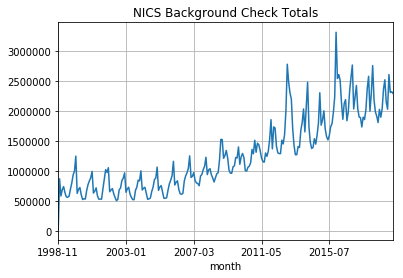

In [82]:
ax1 = bc_per_month.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NICS Background Check Totals')
#plt.xlabel('x label text')
#plt.ylabel('y label text')
plt.savefig('output/t_chk_per_month.png', bbox_inches="tight")

In [83]:
bct_2019 = bct_data[bct_data['month'] >'2019-01'].groupby(['month'])['totals'].sum()
bct_2019.head()

month
2019-02    2028667
2019-03    2604927
2019-04    2305136
2019-05    2320918
2019-06    2291066
Name: totals, dtype: int64

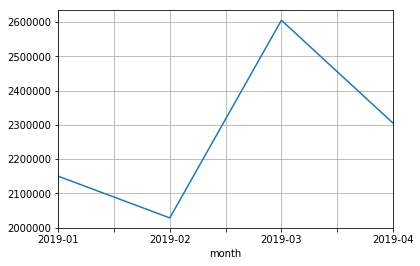

In [90]:
ax1 = bct_2019.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)

In [100]:
bct_range = bct_data[(bct_data['month'] >='2015-01') & (bct_data['month'] <= '2019-12') ].groupby(['month'])['totals'].sum()
bct_range.head()

month
2015-01    1763233
2015-02    1848308
2015-03    2001245
2015-04    1697737
2015-05    1570893
Name: totals, dtype: int64

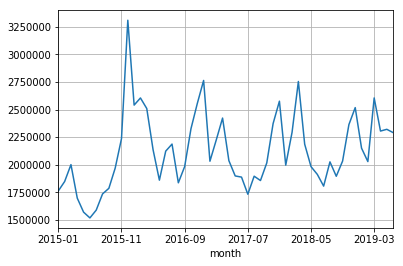

In [101]:
ax1 = bct_range.plot.line(x='month', y='totals')

# Adding grid, title, and labels
plt.grid(True)
plt.savefig('output/2015_2019_bct.png', bbox_inches="tight")

In [84]:
bct_2019 = bct_data[bct_data['month'].str.contains('2019')].groupby(['month'])['totals'].sum()
bct_2019.head()

month
2019-01    2150322
2019-02    2028667
2019-03    2604927
2019-04    2305136
2019-05    2320918
Name: totals, dtype: int64

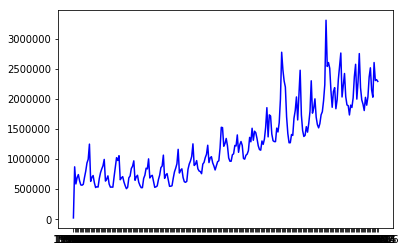

In [48]:
# Plot the world average as a line chart
totals_by_month = plt.plot(bc_per_month, color="blue", label="NICS Background Check Totals" )


In [ ]:
## Set the 'Country Code' to be our index for easy referencing of rows

#combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

## Collect the mean unemployment rates for the world
#average_unemployment = combined_unemployed_data.mean()

## Collect the years where data was collected
#years = average_unemployment.keys()

## Plot the world average as a line chart
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )


In [8]:
firearms_2017 = firearms_data[firearms_data['month'].str.contains('2017')]
#firearms_2017.head()

In [5]:
#state_firearms_sum = firearms_data.groupby(['state'])['totals'].sum()
state_handguns_sum = firearms_2017.groupby(['state'])['handgun'].sum()


In [11]:
#state_handguns_sum.head()

In [ ]:
#Creates labels from count of Ride_ID
#labels = state_firearms_sum.index
#plt.bar(state_firearms, labels = labels, autopct = "%1.1f%%")

#objects = state_firearms_sum.index
x_axis = state_handguns_sum.index
#y_pos = np.arange(len(objects))
y_axis = objects
#performance = [100,80,60,40,20,10]

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.bar(y_axis, x_axis, align='center', alpha=0.1)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, cities)

#plt.xticks(performance)
plt.ylabel('Firearm Transactions (Millions)')
plt.title('States & Territories')

plt.show()
plt.tight_layout()

(Gene) .csv Firearms graphs

ValueError: x and y must be the same size

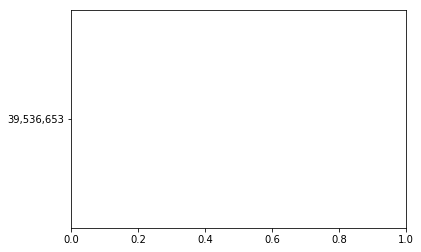

In [10]:
# Build a scatter plot for each data type
plt.scatter(state_handguns_sum, population_data["Population"], marker="o", s=10)

# Incorporate the other graph properties
#plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.title("Population vs Handgun Registrations")
plt.ylabel("Population")
plt.xlabel("Handgun Registration")
plt.grid(True)

# Save the figure
#plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
#plt.show()

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

Perform ####### (Tulgaa) API Calls

Perform ####### (Mike) API Calls
